- 파일
  - 관련 데이터셋 파일은 dsba_project_data 공유 폴더에 올려놓겠습니다.
  https://drive.google.com/drive/folders/1Rca-VfSTLyFvtVmAGt8FBN55YSO8id82?usp=sharing

# 데이터셋 로드

In [ ]:
#코랩에서 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# scaled_df.to_csv("data_integ.csv", index=True)

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#파일 경로 지정(본인 구글 드라이브 폴더명에 따라 수정 바람)
base_path = '/content/drive/MyDrive/digital_smart_busan/DSBA_project_1/dsba_project_data/'

#데이터 불러오기
export_df = pd.read_excel(base_path + 'export_teu.xlsx')  #teu 단위
gdp_df = pd.read_excel(base_path + 'gdp_growth_rate.xlsx')
leading_df = pd.read_excel(base_path + 'oecd_leading.xlsx')
exchange_df = pd.read_excel(base_path + 'won_dollar.xlsx')
gold_df = pd.read_excel(base_path + 'gold_prices.xlsx')
gas_df = pd.read_csv(base_path + 'natural_gas_prices.csv')
brent_df = pd.read_excel(base_path + 'brent_price.xlsx')
trade_df = pd.read_excel(base_path + 'volume_of_trade.xlsx')
#데이터 확인
print("데이터 확인")
print("수출량 :", export_df.shape)
print("GDP성장률 :", gdp_df.shape)
print("경기선행지수 :", leading_df.shape)
print("환율 :", exchange_df.shape)
print("금 :", gold_df.shape)
print("천연가스 :", gas_df.shape)
print("유가 :", brent_df.shape)
print("교역량", trade_df.shape)

데이터 확인
수출량 : (183, 2)
GDP성장률 : (61, 2)
경기선행지수 : (183, 4)
환율 : (183, 2)
금 : (183, 2)
천연가스 : (183, 2)
유가 : (183, 2)
교역량 (183, 2)


In [ ]:
display("수출량 :", export_df.head())
display("GDP성장률 :", gdp_df.head())
display("경기선행지수 :", leading_df.head())
display("환율 :", exchange_df.head())
display("금 :", gold_df.head())
display("천연가스 :", gas_df.head())
display("유가 :", brent_df.head())
display("교역량", trade_df.head())

'수출량 :'

,date,수출량(TEU)
0,2025-03-01,1064571
1,2025-02-01,1037534
2,2025-01-01,1022641
3,2024-12-01,1011650
4,2024-11-01,1005161


'GDP성장률 :'

,date,gdp_growth
0,20251/4,1.1
1,20244/4,1.2
2,20243/4,1.5
3,20242/4,2.3
4,20241/4,3.3


'경기선행지수 :'

,date,korea,USA,china
0,2025-03-01 00:00:00,100.9341,100.4902,100.69960
1,2025-02-01 00:00:00,100.8437,100.5202,100.35960
2,2025-01-01 00:00:00,100.7461,100.5018,100.00910
3,2024-12,100.6691,100.4219,99.65845
4,2024-11,100.6294,100.2861,99.31903


'환율 :'

,date,exchange_rate
0,2025/03,1455.500
1,2025/02,1445.575
2,2025/01,1457.915
3,2024/12,1434.420
4,2024/11,1393.380


'금 :'

,date,gold
0,2025-03-01 00:00:00,2987.09
1,2025-02-01 00:00:00,2896.24
2,2025-01-01 00:00:00,2696.59
3,2024-12,2641.22
4,2024-11,2654.24


'천연가스 :'

,date,gas
0,Mar-25,4.119
1,Feb-25,3.834
2,Jan-25,3.044
3,24-Dec,3.633
4,24-Nov,3.363


'유가 :'

,date,brent
0,2025-03-01 00:00:00,72.73
1,2025-02-01 00:00:00,75.44
2,2025-01-01 00:00:00,79.27
3,2024-12,73.86
4,2024-11,74.35


'교역량'

,date,trade_volue
0,2025-03-01 00:00:00,108.379300
1,2025-02-01 00:00:00,108.324921
2,2025-01-01 00:00:00,108.433763
3,2024-12,103.343056
4,2024-11,101.828595


# 데이터프레임 통합

### 형태가 다른 데이터프레임 처리

- problem : 학습에 사용할 데이터 중, gdp 성장률 데이터는 월별 데이터가 아닌 분기별 데이터를 가지고 있다. 즉, 다른 월별 데이터들과 concatenation을 하기 전에 데이터 프레임 형태를 변형시킬 필요가 있다.
- solution : 각 분기의 값을 해당하는 3개월로  (1분기 -> 1,2,3월  / 2분기 -> 4,5,6월 / 3분기 -> 7,8,9월 / 4분기 -> 10,11,12월)
  

- iterrows() : 각 행을 꺼내서 반복
  - idx : 행의 인덱스 번호
  - row : 행의 내용 전체
  - row['date'] -> 20244/4
  - row['gdp_growth'] ->1.2

In [ ]:
import pandas as pd

def expand_quarterly_to_monthly(gdp_df):
    # 월별 날짜 만들기: 2010-01 ~ 2025-03 (183개월)
    monthly_dates = pd.date_range(start='2010-01-01', end='2025-03-01', freq='MS')

    # 각 분기값을 3개월로 확장
    monthly_gdp = []
    for value in gdp_df['gdp_growth']:
        monthly_gdp.extend([value] * 3)

    # 길이 확인 (디버깅용)
    assert len(monthly_gdp) == len(monthly_dates), \
        f"Length mismatch: {len(monthly_gdp)} vs {len(monthly_dates)}"

    # 결과 DataFrame 만들기
    gdp_growth_df = pd.DataFrame({
        'date': monthly_dates,
        'gdp_growth': monthly_gdp
    })

    return gdp_growth_df


In [ ]:
gdp_growth_df = expand_quarterly_to_monthly(gdp_df)
display(gdp_growth_df.head())
print(gdp_growth_df.shape)  # (183, 2)

,date,gdp_growth
0,2010-01-01,1.1
1,2010-02-01,1.1
2,2010-03-01,1.1
3,2010-04-01,1.2
4,2010-05-01,1.2


(183, 2)


### 데이터셋 합치기

In [ ]:
# 필요한 컬럼만 가져와서 Series로 저장
export = export_df['수출량(TEU)'].values
gdp = gdp_growth_df['gdp_growth'].values
exchange = exchange_df['exchange_rate'].values
gold = gold_df['gold'].values
gas = gas_df['gas'].values
korea_leading = leading_df['korea'].values
usa_leading = leading_df['USA'].values
china_leading = leading_df['china'].values
brent = brent_df['brent'].values
trade = trade_df['trade_volue'].values

# 공통 날짜 인덱스
dates = pd.date_range(start='2010-01-01', end='2025-03-01', freq='MS')[::-1]

# 하나의 데이터프레임으로 만들기
original_df = pd.DataFrame({
    'date': dates,
    'export': export,
    'gdp_growth': gdp,
    'exchange_rate': exchange,
    'gold_price': gold,
    'gas_price': gas,
    'korea_lead': korea_leading,
    'usa_lead' : usa_leading,
    'china_lead' : china_leading,
    'brent_price' : brent,
    'trade' : trade
})

# 날짜를 인덱스로
original_df.set_index('date', inplace=True)
original_df.index = original_df.index.strftime('%Y-%m') #날짜 표시 형식 변경

# 결과 확인
display(original_df.head())

,export,gdp_growth,exchange_rate,gold_price,gas_price,korea_lead,usa_lead,china_lead,brent_price,trade
date,,,,,,,,,,
2025-03,1064571,1.1,1455.500,2987.09,4.119,100.9341,100.4902,100.69960,72.73,108.379300
2025-02,1037534,1.1,1445.575,2896.24,3.834,100.8437,100.5202,100.35960,75.44,108.324921
2025-01,1022641,1.1,1457.915,2696.59,3.044,100.7461,100.5018,100.00910,79.27,108.433763
2024-12,1011650,1.2,1434.420,2641.22,3.633,100.6691,100.4219,99.65845,73.86,103.343056
2024-11,1005161,1.2,1393.380,2654.24,3.363,100.6294,100.2861,99.31903,74.35,101.828595


#데이터 전처리

### 결측치 확인

In [ ]:
original_df.isnull().sum()
#결측치는 존재하지 않는다.

,0
export,0
gdp_growth,0
exchange_rate,0
gold_price,0
gas_price,0
korea_lead,0
usa_lead,0
china_lead,0
brent_price,0
trade,0


## 이상치 확인
- 확인 결과, 실제 발생한 사건에 의한 값(ex-코로나 등)
- SARIMAX, TFT 등은 이상치에 매우 민감하기 때문에 모델 추세 예측이나 계수 추정에 왜곡을 일으킬 가능성이 높음.
- 트리 기반 모델은 이상치에 상대적으로 강하여 꼭 제거하지 않아도 된다.
- 이상치 제거를 수행한, 이상치를 제거하지 않은 데이터 프레임 모두를 사용해볼 예정


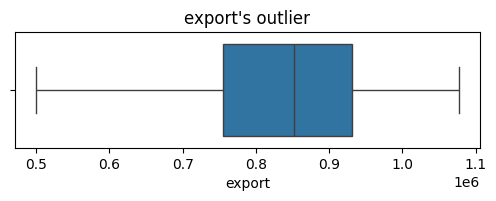

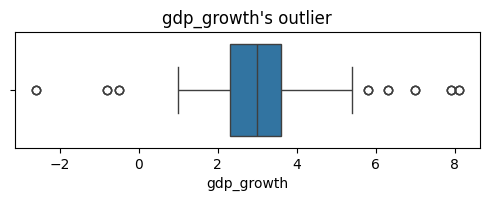

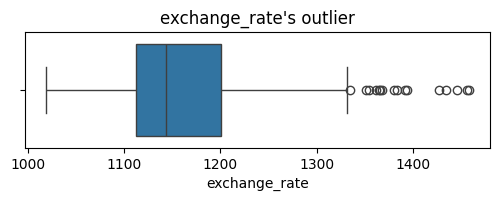

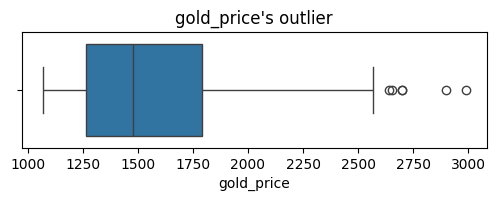

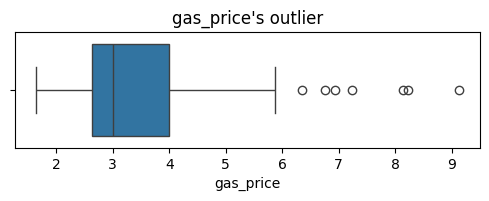

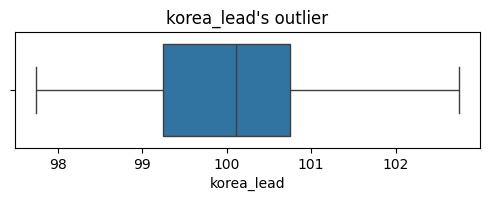

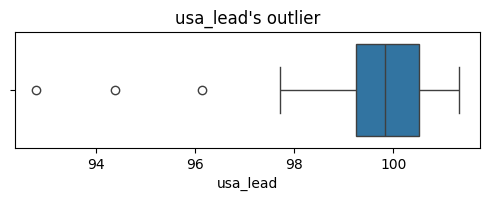

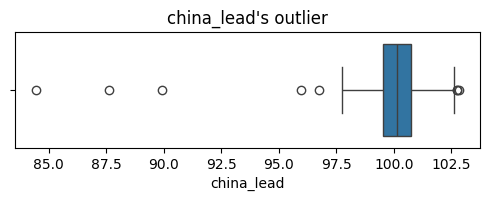

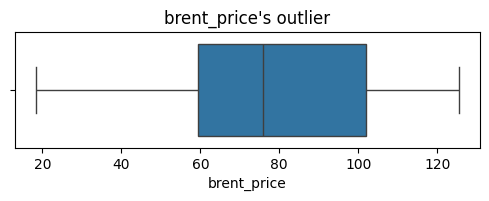

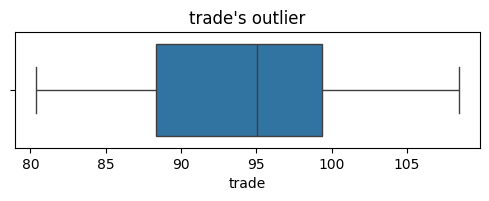

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols = original_df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=original_df[col])
    plt.title(f'{col}' + "'s outlier")
    plt.show()


In [ ]:
#이상치 개수 확인
outliers_list = ['gdp_growth','exchange_rate','gold_price', 'gas_price','usa_lead', 'china_lead']
def count_outliers(outliers_list):
    for i, item in enumerate(outliers_list):
        Q1, Q3 = np.percentile(original_df[item], [25, 75])
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = len(original_df[(original_df[item] < lower_bound) | (original_df[item] > upper_bound)])
        print(f'{item}: {outliers}')

count_outliers(outliers_list)


gdp_growth: 24
exchange_rate: 16
gold_price: 6
gas_price: 7
usa_lead: 3
china_lead: 8


In [ ]:
#이상치 제거된 cleaned_original_df (추세 유지를 위해 선형보간법 사용)
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler, StandardScaler

#이상치 탐지 함수 (IQR 기반)
def find_outliers_iqr(series):
    q1 = np.percentile(series, 25)
    q3 = np.percentile(series, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return series[(series < lower_bound) | (series > upper_bound)].index

cleaned_original_df = original_df.copy()

#이상치를 NaN으로 처리
for col in outliers_list:
    outlier_index = find_outliers_iqr(cleaned_original_df[col])
    cleaned_original_df.loc[outlier_index, col] = np.nan

#선형 보간으로 NaN 채우기
cleaned_original_df.interpolate(method='linear', inplace=True)

#남아있는 NaN 중앙값으로 대체
cleaned_original_df.fillna(cleaned_original_df.median(), inplace=True)

#복사본 생성
scaled_cleaned_df = cleaned_original_df.copy()

#인덱스 재정렬
scaled_cleaned_df.index = pd.to_datetime(scaled_cleaned_df.index)
scaled_cleaned_df.index = scaled_cleaned_df.index.to_period('M').astype(str)

#결과 확인
print("이상치 제거 완료된 데이터프레임 :")
print(scaled_cleaned_df.head())

이상치 제거 완료된 데이터프레임 :
          export  gdp_growth  exchange_rate  gold_price  gas_price  \
date                                                                 
2025-03  1064571         1.1        1135.21     1417.87      4.119   
2025-02  1037534         1.1        1135.21     1417.87      3.834   
2025-01  1022641         1.1        1135.21     1417.87      3.044   
2024-12  1011650         1.2        1135.21     1417.87      3.633   
2024-11  1005161         1.2        1135.21     1417.87      3.363   

         korea_lead  usa_lead  china_lead  brent_price       trade  
date                                                                
2025-03    100.9341  100.4902   100.69960        72.73  108.379300  
2025-02    100.8437  100.5202   100.35960        75.44  108.324921  
2025-01    100.7461  100.5018   100.00910        79.27  108.433763  
2024-12    100.6691  100.4219    99.65845        73.86  103.343056  
2024-11    100.6294  100.2861    99.31903        74.35  101.828595  


## scaling
- StandardScaler: 값들이 정규 분포에 가깝거나 선형 모델을 사용할 때

- MinMaxScaler: 값들을 특정 범위로 맞추고 싶을 때 (특히 신경망)

- RobustScaler: 이상치가 많을 때 사용
  - gas_price , usa , china

- 스케일링 정리
  - robust scaler : gdp, exchange, gold, gas price , brent (고점 이상치 대응 가능, gdp와 같이 음수 값 허용)
  - standard scaler : korea(정규분포 유사), usa (범위 좁음), china

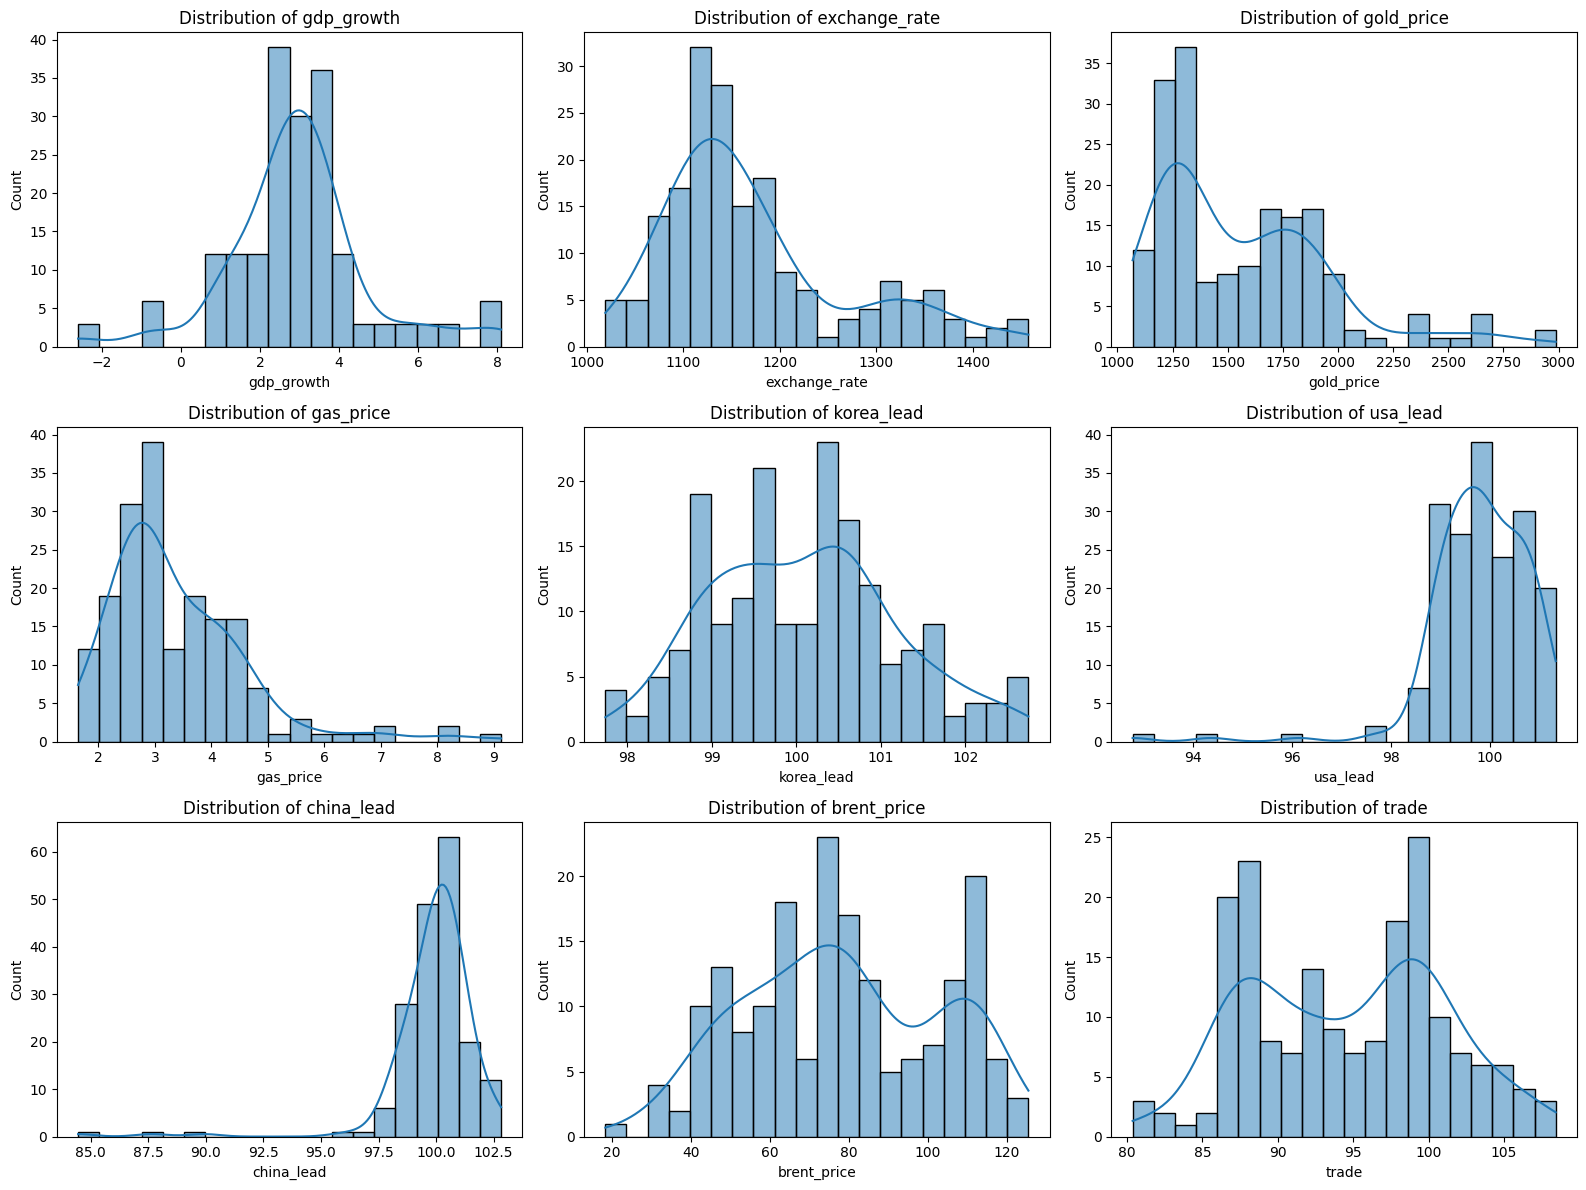

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 피처 리스트
features = ['gdp_growth', 'exchange_rate', 'gold_price', 'gas_price',
            'korea_lead', 'usa_lead', 'china_lead', 'brent_price', 'trade']

# 시각화
plt.figure(figsize=(16, 12))
for i, col in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.histplot(original_df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()
#

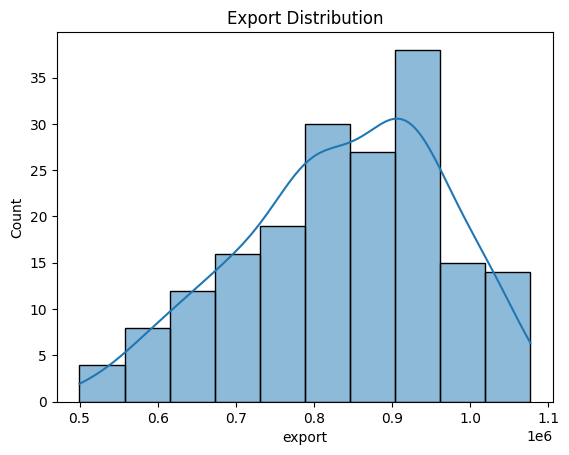

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(original_df['export'], kde=True)
plt.title("Export Distribution")
plt.show()

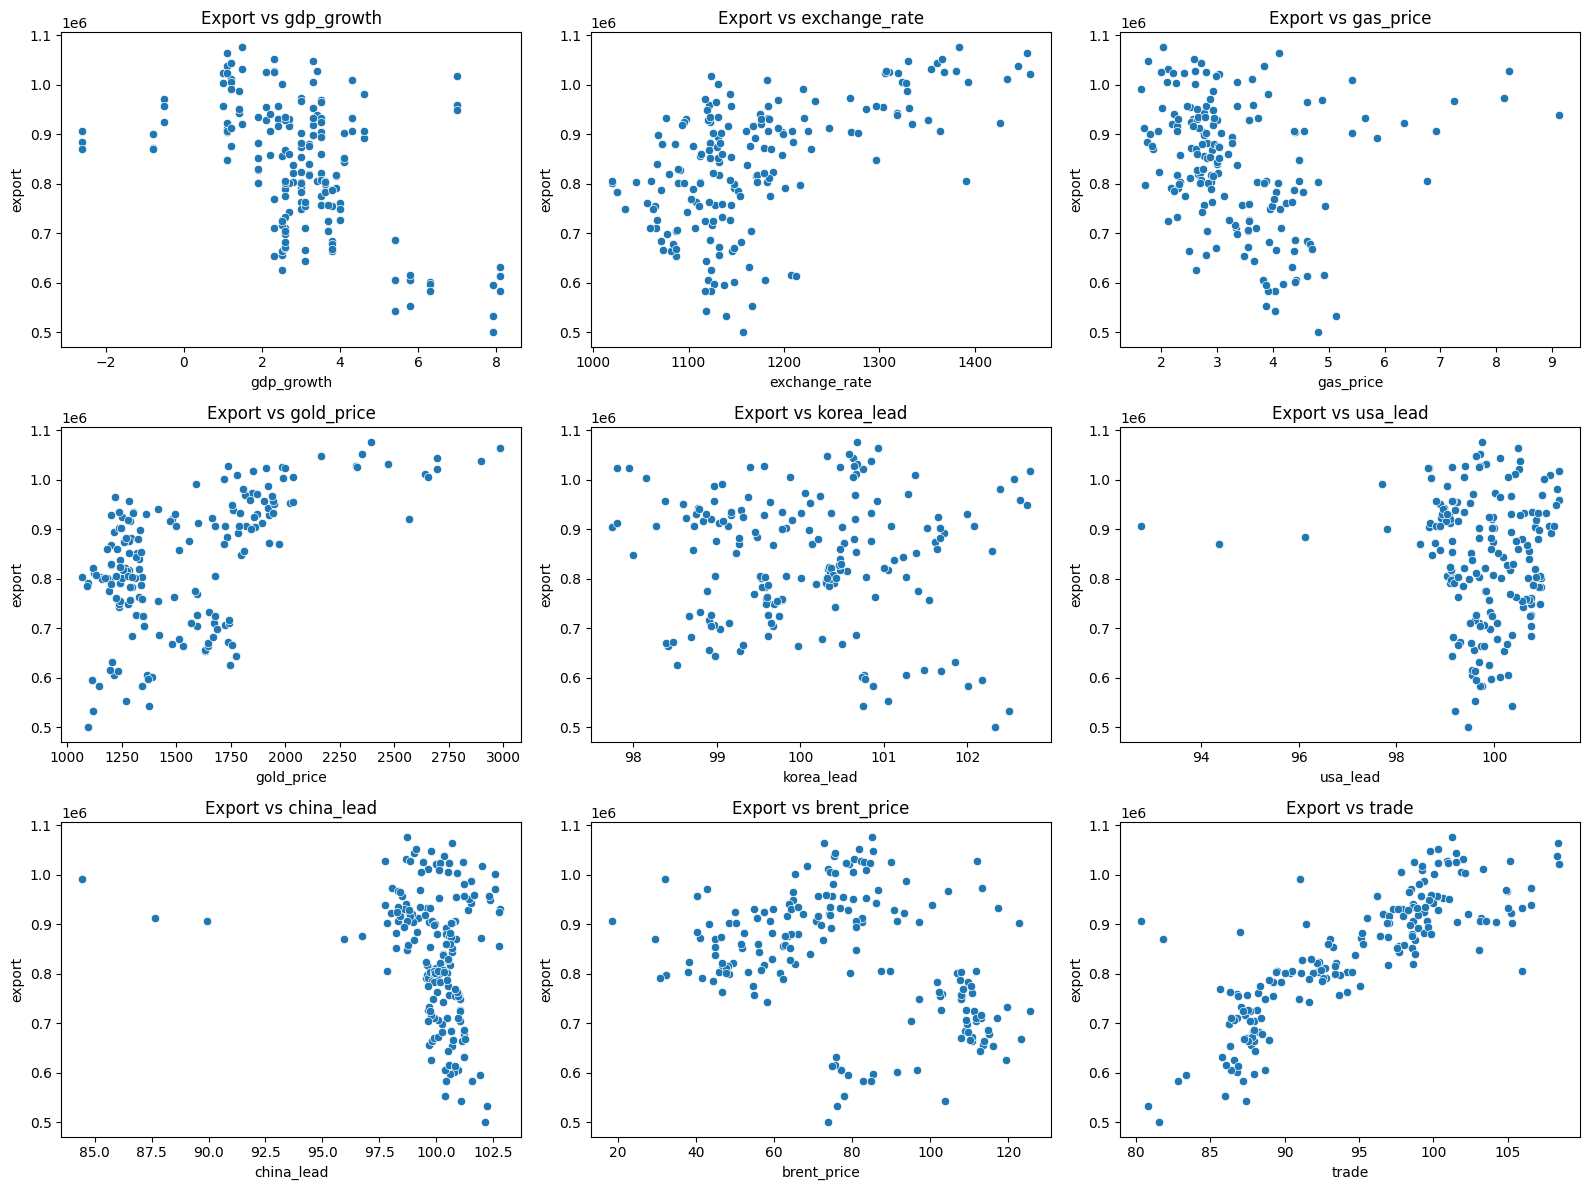

In [ ]:
#scatter로 전체적인 상관관계 확인
import seaborn as sns

features = ['gdp_growth', 'exchange_rate', 'gas_price','gold_price',
            'korea_lead', 'usa_lead','china_lead', 'brent_price', 'trade']

plt.figure(figsize=(16, 12))
for i, col in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x = original_df[col], y=original_df['export'])
    plt.title(f'Export vs {col}')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import RobustScaler, StandardScaler
import pandas as pd

# 사용할 변수들
robust_features = ['gdp_growth', 'exchange_rate', 'gold_price', 'gas_price', 'brent_price', 'trade']
standard_features = ['korea_lead', 'usa_lead', 'china_lead']

# 복사본 생성
scaled_df = original_df.copy()

# RobustScaler 적용
robust_scaler = RobustScaler()
scaled_df[robust_features] = robust_scaler.fit_transform(original_df[robust_features])

# StandardScaler 적용
standard_scaler = StandardScaler()
scaled_df[standard_features] = standard_scaler.fit_transform(original_df[standard_features])


In [ ]:
scaled_df.head()

,export,gdp_growth,exchange_rate,gold_price,gas_price,korea_lead,usa_lead,china_lead,brent_price,trade
date,,,,,,,,,,
2025-03,1064571,-1.461538,3.551081,2.858890,0.818944,0.766726,0.660858,0.405080,-0.075827,1.204516
2025-02,1037534,-1.461538,3.438168,2.686649,0.611293,0.684879,0.689908,0.234979,-0.012010,1.199597
2025-01,1022641,-1.461538,3.578555,2.308137,0.035701,0.596513,0.672091,0.059624,0.078182,1.209444
2024-12,1011650,-1.384615,3.311263,2.203162,0.464845,0.526799,0.594719,-0.115805,-0.049217,0.748886
2024-11,1005161,-1.384615,2.844369,2.227847,0.268124,0.490855,0.463216,-0.285617,-0.037678,0.611872


----

In [ ]:
from sklearn.preprocessing import RobustScaler

# export 원본값 저장
scaled_df['export_restored'] = scaled_df['export']

# RobustScaler 초기화 및 학습
target_scaler = RobustScaler()
scaled_df['export'] = target_scaler.fit_transform(
    scaled_df[['export']]
)
scaled_df.head()

,export,gdp_growth,exchange_rate,gold_price,gas_price,korea_lead,usa_lead,china_lead,brent_price,trade,export_restored
date,,,,,,,,,,,
2025-03,1.204444,-1.461538,3.551081,2.858890,0.818944,0.766726,0.660858,0.405080,-0.075827,1.204516,1064571
2025-02,1.050728,-1.461538,3.438168,2.686649,0.611293,0.684879,0.689908,0.234979,-0.012010,1.199597,1037534
2025-01,0.966055,-1.461538,3.578555,2.308137,0.035701,0.596513,0.672091,0.059624,0.078182,1.209444,1022641
2024-12,0.903567,-1.384615,3.311263,2.203162,0.464845,0.526799,0.594719,-0.115805,-0.049217,0.748886,1011650
2024-11,0.866675,-1.384615,2.844369,2.227847,0.268124,0.490855,0.463216,-0.285617,-0.037678,0.611872,1005161


In [ ]:
scaled_df.tail()

,export,gdp_growth,exchange_rate,gold_price,gas_price,korea_lead,usa_lead,china_lead,brent_price,trade,export_restored
date,,,,,,,,,,,
2010-05,-1.250780,3.923077,0.224687,-0.516380,0.980692,1.599408,-0.120287,0.664885,0.000000,-0.839025,632723
2010-04,-1.527470,3.923077,-0.298635,-0.630626,0.673953,1.743183,-0.098566,0.856299,0.208878,-1.102936,584056
2010-03,-1.457512,3.769231,-0.065074,-0.691806,0.636794,1.886687,-0.167107,1.019947,0.067821,-1.059457,596361
2010-02,-2.005901,3.769231,0.156086,-0.727183,1.324590,2.034808,-0.336104,1.133014,-0.051807,-1.219829,499905
2010-01,-1.822747,3.769231,-0.051650,-0.681625,1.556284,2.183653,-0.589262,1.178041,0.005181,-1.289500,532120


In [ ]:
# 인덱스를 datetime으로 변환
scaled_df.index = pd.to_datetime(scaled_df.index)

# 인덱스를 yyyy-mm 문자열로 변환
scaled_df.index = scaled_df.index.to_period('M').astype(str)
# 날짜 기준으로 오름차순 정렬

scaled_df = scaled_df.sort_index()
scaled_df.head()

In [ ]:
scaled_df.head()

,export,gdp_growth,exchange_rate,gold_price,gas_price,korea_lead,usa_lead,china_lead,brent_price,trade,export_restored
date,,,,,,,,,,,
2025-03,1.204444,-1.461538,3.551081,2.858890,0.818944,0.766726,0.660858,0.405080,-0.075827,1.204516,1064571
2025-02,1.050728,-1.461538,3.438168,2.686649,0.611293,0.684879,0.689908,0.234979,-0.012010,1.199597,1037534
2025-01,0.966055,-1.461538,3.578555,2.308137,0.035701,0.596513,0.672091,0.059624,0.078182,1.209444,1022641
2024-12,0.903567,-1.384615,3.311263,2.203162,0.464845,0.526799,0.594719,-0.115805,-0.049217,0.748886,1011650
2024-11,0.866675,-1.384615,2.844369,2.227847,0.268124,0.490855,0.463216,-0.285617,-0.037678,0.611872,1005161


In [ ]:
# scaled_df.to_csv("scaled_df.csv", index=True)

In [ ]:
#cleaned_original_df 스케일링
scaled_cleaned_df = cleaned_original_df.copy()

# RobustScaler
robust_scaler = RobustScaler()
scaled_cleaned_df[robust_features] = robust_scaler.fit_transform(cleaned_original_df[robust_features])

# StandardScaler
standard_scaler = StandardScaler()
scaled_cleaned_df[standard_features] = standard_scaler.fit_transform(cleaned_original_df[standard_features])

# export도 별도 스케일링
scaled_cleaned_df['export_restored'] = cleaned_original_df['export']
target_scaler = RobustScaler()
scaled_cleaned_df['export'] = target_scaler.fit_transform(cleaned_original_df[['export']])

# 인덱스 재정렬
scaled_cleaned_df.index = pd.to_datetime(scaled_cleaned_df.index)
scaled_cleaned_df.index = scaled_cleaned_df.index.to_period('M').astype(str)
scaled_cleaned_df = scaled_cleaned_df.sort_index()

# 결과 확인
print("이상치 제거 및 전처리 완료된 데이터프레임:")
scaled_cleaned_df.head()

이상치 제거 및 전처리 완료된 데이터프레임:


,export,gdp_growth,exchange_rate,gold_price,gas_price,korea_lead,usa_lead,china_lead,brent_price,trade,export_restored
date,,,,,,,,,,,
2010-01,-1.822747,1.882353,0.051050,-0.604089,1.556284,2.183653,-0.837192,1.994996,0.005181,-1.289500,532120
2010-02,-2.005901,1.882353,0.309270,-0.652759,1.324590,2.034808,-0.507103,1.910938,-0.051807,-1.219829,499905
2010-03,-1.457512,1.882353,0.034363,-0.614966,0.636794,1.886687,-0.286749,1.699860,0.067821,-1.059457,596361
2010-04,-1.527470,1.882353,-0.255957,-0.549607,0.673953,1.743183,-0.197380,1.394357,0.208878,-1.102936,584056
2010-05,-1.250780,1.882353,0.394541,-0.427557,0.980692,1.599408,-0.225701,1.037018,0.000000,-0.839025,632723


# EDA
- 데이터프레임 설명
  - gdp_growth : gdp 성장률
  - exchange_rage : 원달러 환율
  - korea_lead : oecd 한국 경기선행지수
  - usa_lead_scaled : oecd 미국 경기선행지수
  - china_lead_scaled : oecd 중국 경기선행지수
  - brent_price : 유가
  - gold_price_scaled : 금값
  - gas_price_scaled : 천연가스

## 일변량 분석
- 개별 변수들의 특성 확인

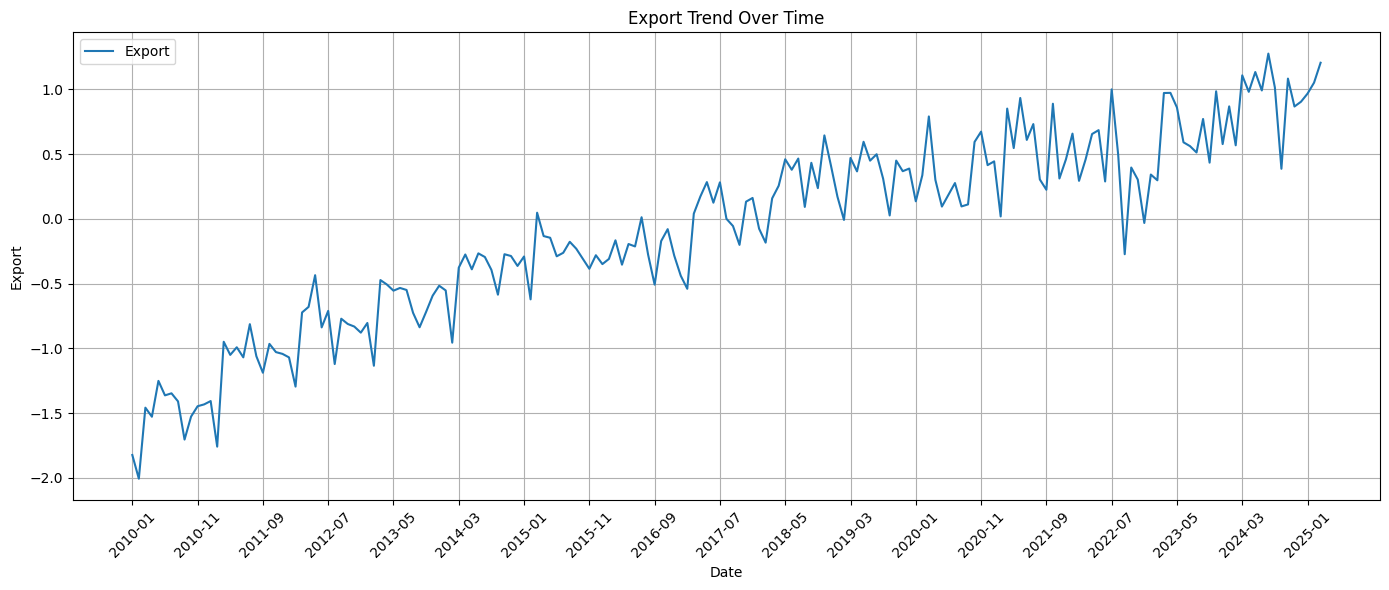

In [ ]:
import matplotlib.pyplot as plt

# 예시 데이터프레임: scaled_df (index가 datetime 또는 str 형식의 월 정보)
plt.figure(figsize=(14, 6))
plt.plot(scaled_df.index, scaled_df['export'], label='Export')

# x축 레이블 10개월마다 표시
plt.xticks(ticks=range(0, len(scaled_df.index), 10), labels=scaled_df.index[::10], rotation=45)

# 보기 좋게 꾸미기
plt.title('Export Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Export')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()



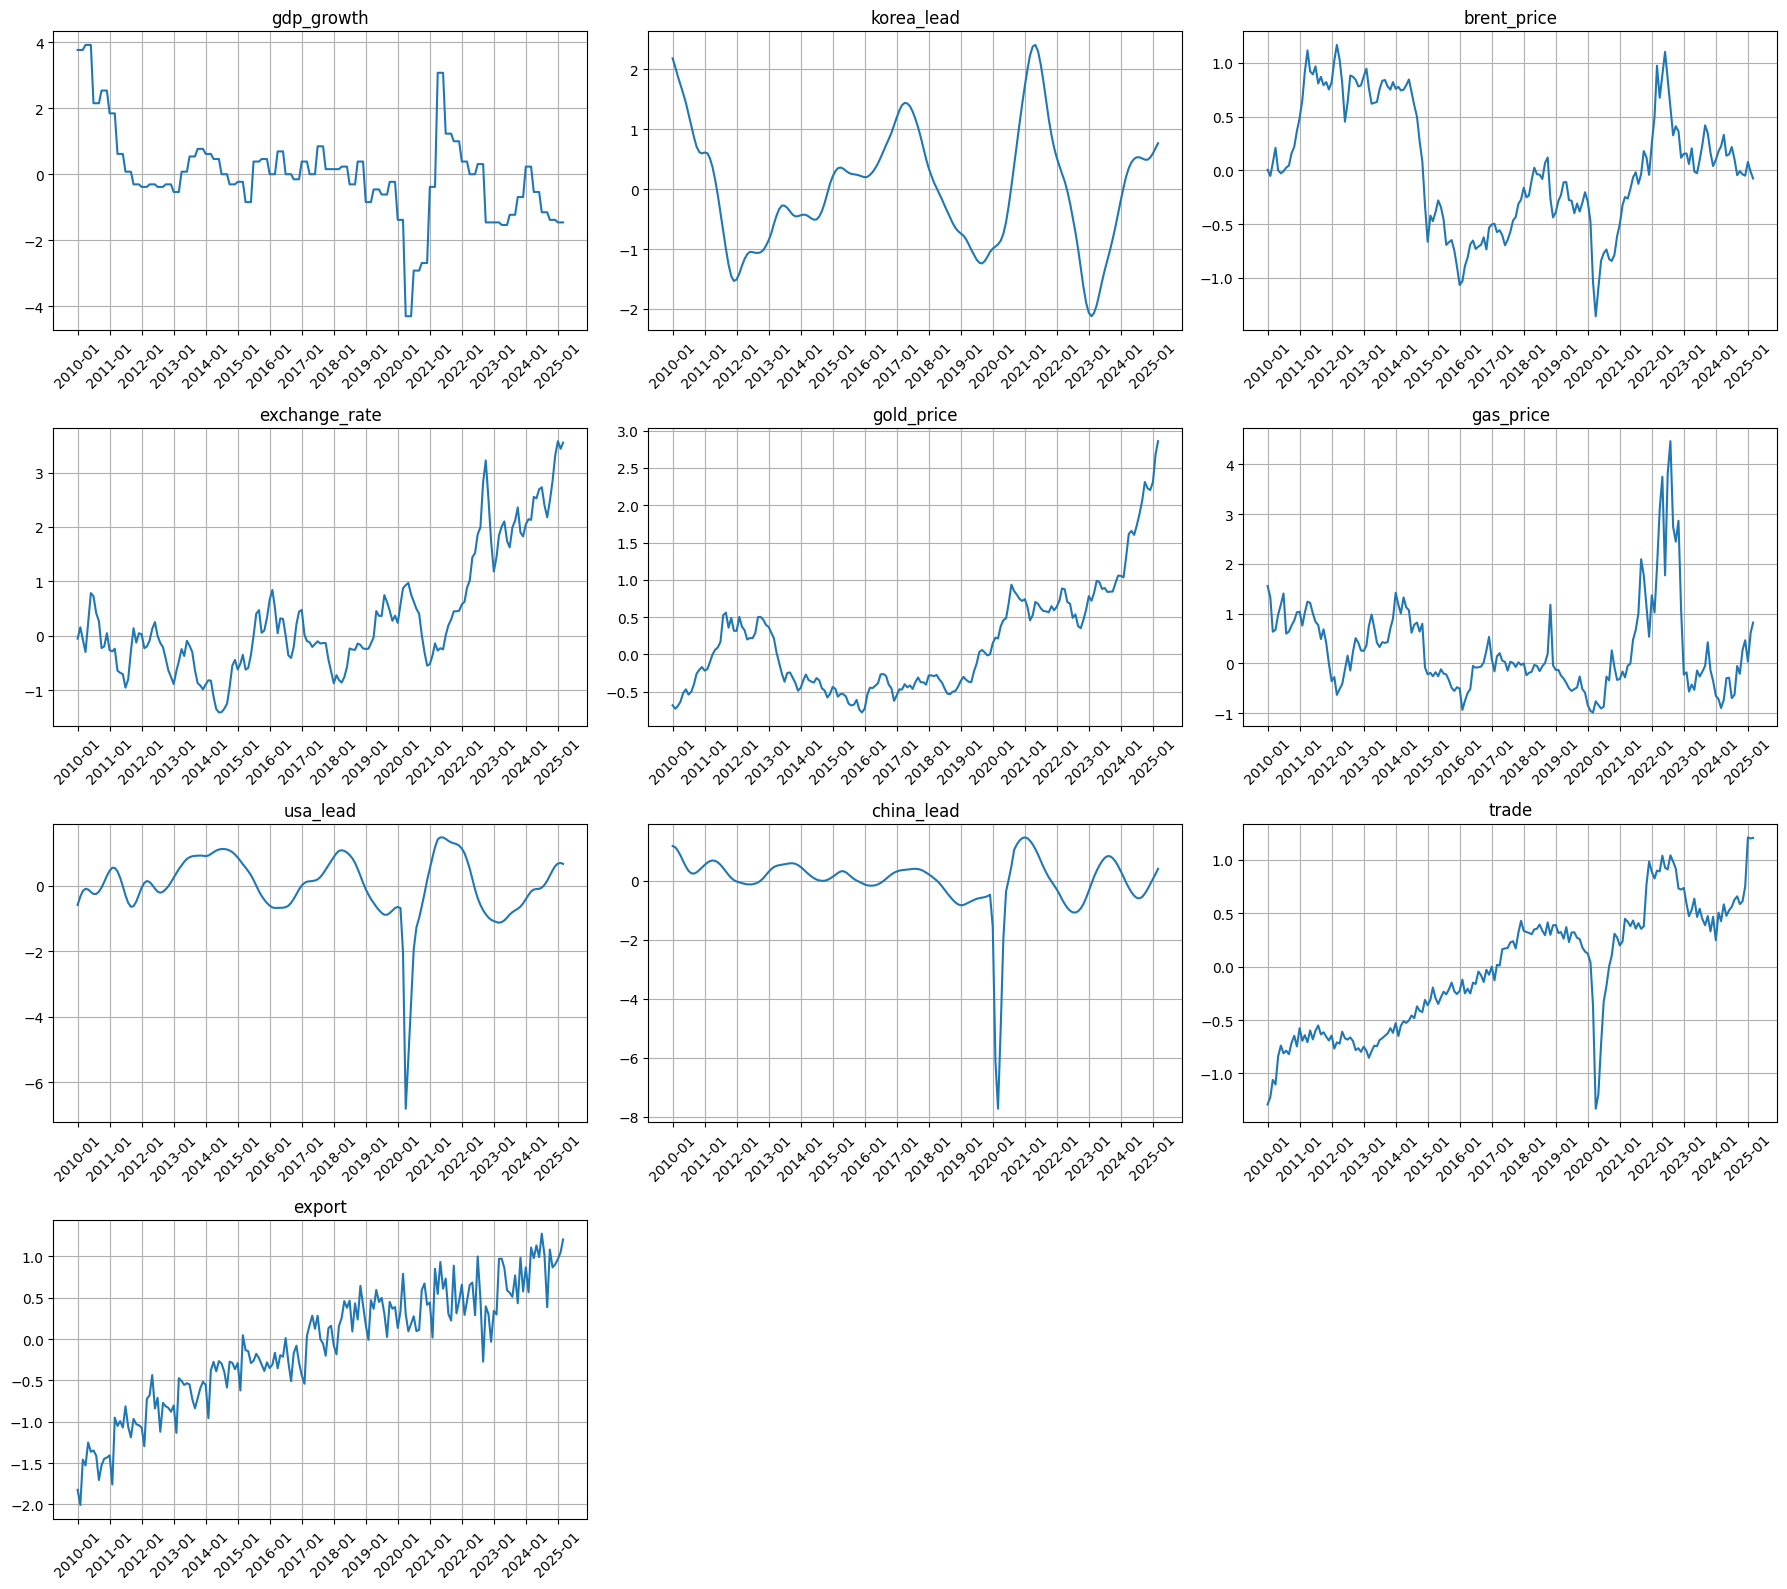

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# datetime 변환 (필요 시)
scaled_df.index = pd.to_datetime(scaled_df.index)

# 그래프에 표시할 컬럼들
columns = [
    'gdp_growth', 'korea_lead', 'brent_price',
    'exchange_rate', 'gold_price', 'gas_price',
    'usa_lead', 'china_lead', 'trade', 'export'
]

# subplot 설정
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols
plt.figure(figsize=(18, n_rows * 4))

# 1년마다 1월인 날짜들 추출
tick_locs = [d for d in scaled_df.index if d.month == 1]

# 서브플롯 그리기
for i, col in enumerate(columns):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.plot(scaled_df.index, scaled_df[col], label=col)
    plt.title(col, fontsize=12)
    plt.xticks(ticks=tick_locs, labels=[d.strftime('%Y-%m') for d in tick_locs], rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()


##상관관계

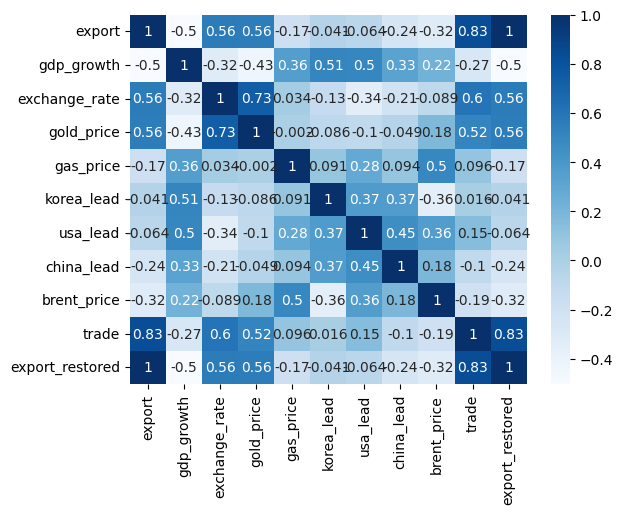

In [ ]:
scaled_df.corr()
ax = sns.heatmap(scaled_df.corr(), cmap = 'Blues', annot=True)

In [ ]:
#다중공선성 여부 확인
#VIF 척도 (분산팽창지수)
#VIF 10 이상이 되면 다중공선성 있다고 판단
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# VIF 계산 함수
def feature_engineering_XbyVIF(scaled_df):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(scaled_df.values, i)
                         for i in range(scaled_df.shape[1])]
    vif['Feature'] = scaled_df.columns
    return vif

# 타겟 변수 'export' 제외한 설명 변수만 사용
X_features = scaled_df.drop(columns=['export'])

# VIF 계산
vif = feature_engineering_XbyVIF(X_features)

# VIF 내림차순 정렬
vif_sorted = vif.sort_values('VIF_Factor', ascending=False).reset_index(drop=True)

# 결과 확인
print(vif_sorted)


   VIF_Factor          Feature
0    7.197960      brent_price
1    6.144411       gold_price
2    4.944164    exchange_rate
3    4.880820       korea_lead
4    3.951042         usa_lead
5    3.647505       gdp_growth
6    3.528594            trade
7    2.451009        gas_price
8    1.562979  export_restored
9    1.449073       china_lead


### 피어슨, 스피어맨, 켄달 상관관계 메소드

In [ ]:
# 타겟값 'export'와 수치형 Feature들만 사용
df_corr = scaled_df[['export', 'gdp_growth', 'exchange_rate', 'gold_price', 'gas_price',
              'korea_lead', 'usa_lead', 'china_lead', 'brent_price','trade']]

# 피어슨
corr_pearson = df_corr.corr(method='pearson')

# 스피어맨
corr_spearman = df_corr.corr(method='spearman')

# 켄달
corr_kendall = df_corr.corr(method='kendall')


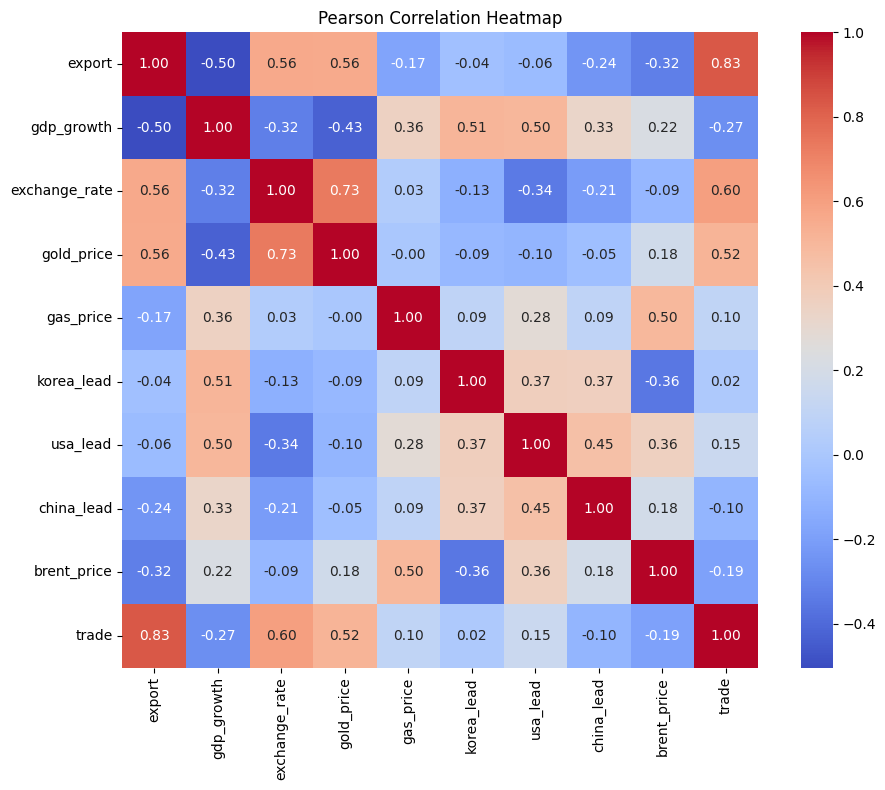

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_pearson, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Pearson Correlation Heatmap')
plt.tight_layout()
plt.show()


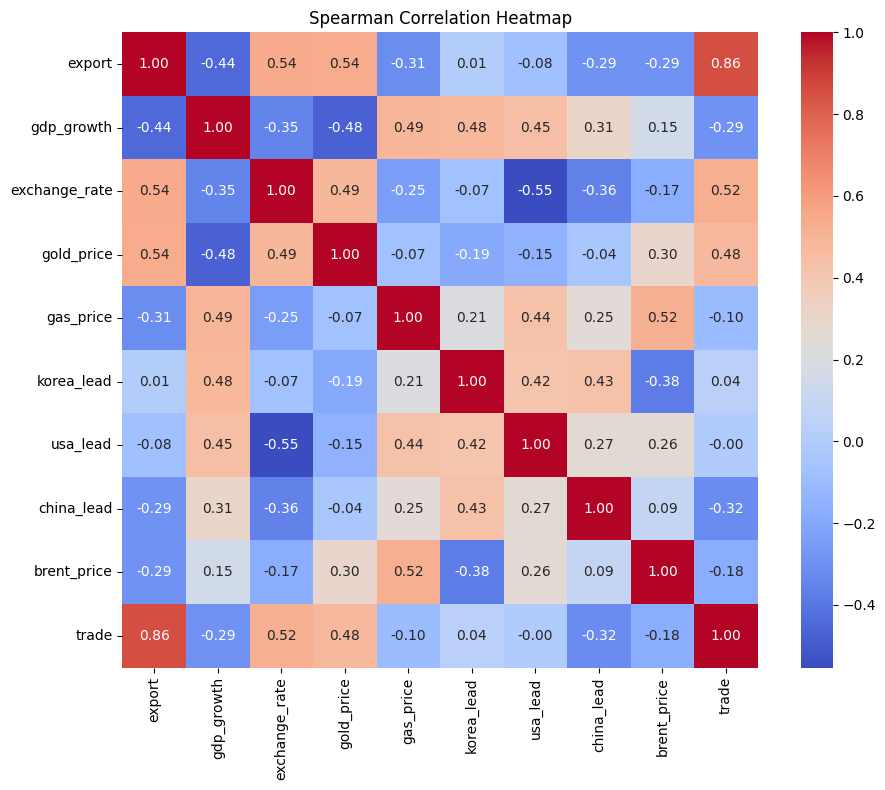

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Spearman Correlation Heatmap')
plt.tight_layout()
plt.show()


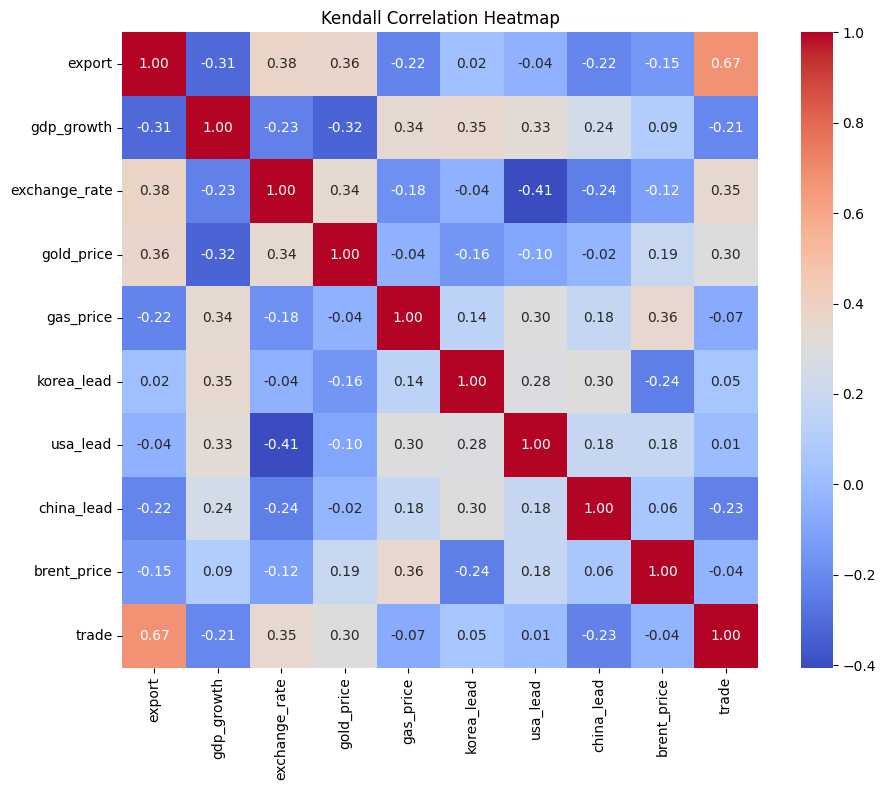

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_kendall, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Kendall Correlation Heatmap')
plt.tight_layout()
plt.show()


In [ ]:
#feature importance에 의한 변수 선택
feat_imp_df = scaled_df.drop(columns=['gdp_growth', 'china_lead'])
feat_imp_df.to_csv("feat_imp_df.csv", index=True)

### 타켓 변수와의 상관관계 분석

In [ ]:
corr_with_export = corr_pearson['export'].sort_values(ascending=False)
print(corr_with_export)
#exchange rate : 양의 상관관계
#gold : 양의 상관관계
#gdp_growth : 음의 상관관계 ? (주의 필요)

export           1.000000
trade            0.832635
exchange_rate    0.563326
gold_price       0.556384
korea_lead      -0.040578
usa_lead        -0.063815
gas_price       -0.174573
china_lead      -0.242205
brent_price     -0.324473
gdp_growth      -0.503237
Name: export, dtype: float64


In [ ]:
corr_with_export = corr_spearman['export'].sort_values(ascending=False)
print(corr_with_export)

export           1.000000
trade            0.855659
exchange_rate    0.542043
gold_price       0.535372
korea_lead       0.006940
usa_lead        -0.075380
brent_price     -0.290756
china_lead      -0.294284
gas_price       -0.314367
gdp_growth      -0.444262
Name: export, dtype: float64


In [ ]:
corr_with_export = corr_kendall['export'].sort_values(ascending=False)
print(corr_with_export)

export           1.000000
trade            0.674173
exchange_rate    0.376111
gold_price       0.364559
korea_lead       0.019876
usa_lead        -0.038732
brent_price     -0.149823
china_lead      -0.218292
gas_price       -0.220280
gdp_growth      -0.307487
Name: export, dtype: float64
